# Geopandas recipes for feature data
various sources

In [1]:
import numpy as np
import pandas as pd
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt

# Creating a geodataframe from point lat-lon features
This example is taken from the geopandas documentation here: https://geopandas.org/gallery/create_geopandas_from_pandas.html

In [2]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [3]:
df

,City,Country,Latitude,Longitude
0,Buenos Aires,Argentina,-34.58,-58.66
1,Brasilia,Brazil,-15.78,-47.91
2,Santiago,Chile,-33.45,-70.66
3,Bogota,Colombia,4.60,-74.08
4,Caracas,Venezuela,10.48,-66.86


In [4]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

In [5]:
gdf

,City,Country,Latitude,Longitude,geometry
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86000 10.48000)


In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<AxesSubplot:>

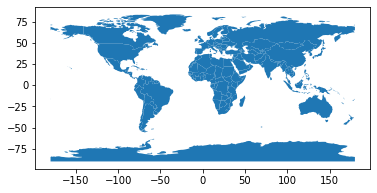

In [7]:
world.plot()

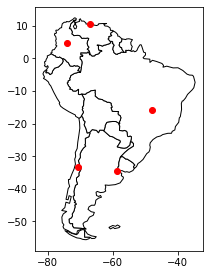

In [8]:
f, ax = plt.subplots(1,1, figsize=(3, 5))
world[world.continent == 'South America'].plot(
    color='white', edgecolor='black', ax=ax)
gdf.plot(ax=ax, color='red')
plt.show()

# Create a regular grid of polygons
Example adapted from here: https://gis.stackexchange.com/questions/269243/creating-polygon-grid-using-geopandas

In [9]:
xmin, ymin, xmax, ymax = -180, -90, 180, 90
length = 10
width = 10
cols = np.arange(xmin, xmax, width)
rows = np.arange(ymin, ymax, length)

In [10]:
polygons = [Polygon([(x,y), 
                     (x+width, y),
                     (x+width, y+length),
                     (x, y+length)]) for x in cols for y in rows]
grid = gpd.GeoDataFrame({'geometry':polygons})

In [11]:
grid = grid.set_crs(epsg=4326)

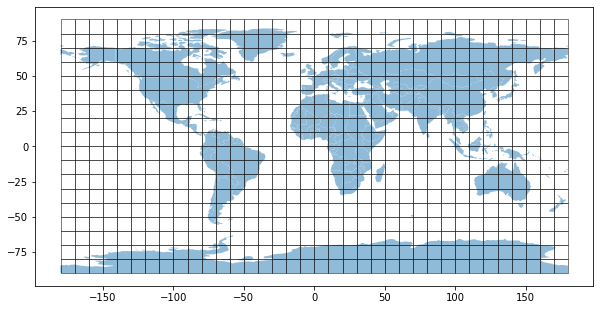

In [12]:
f, ax = plt.subplots(1,1, figsize=(10, 6))
world.plot(ax=ax)
grid.plot(color='white', edgecolor='black', ax=ax, alpha=0.5)
plt.show()

# Clipping polygons using other polygons

In [13]:
sa = world[world.continent == 'South America']
sa_grid = gpd.clip(grid, sa)

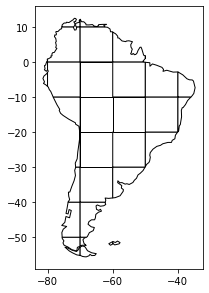

In [14]:
f, ax = plt.subplots(1,1, figsize=(3, 5))
sa_grid.plot(color='white', edgecolor='black', ax=ax)
plt.show()

# Intersection

Note that `overlay` is only for geometries of the same type. See the documentation:

https://geopandas.org/reference/geopandas.overlay.html

In [15]:
sa = world[world.continent == 'South America']
sa_grid_int = gpd.overlay(grid, sa, how='intersection')

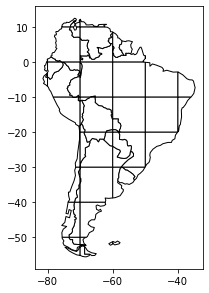

In [16]:
f, ax = plt.subplots(1,1, figsize=(3, 5))
sa_grid_int.plot(color='white', edgecolor='black', ax=ax)
plt.show()